# Impact of Macroeconomic Factors on India Stock Market

# Object:

The aim of the study is to predict the Indian stock market movement to facilitate decision making of investors regarding investment in securities. 


# Inputs:

Stock market (NIFTY)  will be predicted based on 
- Macroeconomic factors and 
- Major heavyweight NIFTY50 securities

# Installation of necessary packages and Libraries:

In [3]:
!pip install keras

In [4]:
!pip install tensorflow

In [7]:
import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib. pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam

In [8]:
df=pd.read_csv('C:\\Users\\kunkr\\Desktop\\python_practice\\BYOP PROJECT\\Data\\merged_data_macro_factors.csv')

# EDA:

Top 5 rows data observation:

In [9]:
df.head()

,Date,Cash Reserve Ratio,Policy Repo Rate,Reverse Repo Rate,FPI_EQ,FPI_Debt,FPI_Total,forex_res_inr,forex_res_usd,gold_res_inr,...,cpi,wpi,Crude,USDINR,Open,High,Low,Close,Volume,Turnover
0,2012-04-01,4.75,8.5,7.5,-1109,-3789,-4898,1369929.0,260839.0,139797.0,...,117.0,104.7,979.97,51.1565,5206.60,5307.10,5203.65,5295.55,164790056,6.082930e+10
1,2012-04-02,4.75,8.5,7.5,-1109,-3789,-4898,1369929.0,260839.0,139797.0,...,117.0,104.7,986.19,51.1565,5296.35,5331.55,5278.80,5317.90,134538287,4.583680e+10
2,2012-04-03,4.75,8.5,7.5,-1109,-3789,-4898,1369929.0,260839.0,139797.0,...,117.0,104.7,979.97,50.5645,5353.20,5378.75,5344.45,5358.50,152496489,5.256860e+10
3,2012-04-04,4.75,8.5,7.5,-1109,-3789,-4898,1369929.0,260839.0,139797.0,...,117.0,104.7,968.43,51.0465,5328.65,5338.40,5305.30,5322.90,122106162,4.084370e+10
4,2012-04-05,4.75,8.5,7.5,-1109,-3789,-4898,1369929.0,260839.0,139797.0,...,117.0,104.7,976.85,51.0465,5328.65,5338.40,5305.30,5322.90,122106162,4.084370e+10


In [40]:
df.tail()

,Date,Cash Reserve Ratio,Policy Repo Rate,Reverse Repo Rate,FPI_EQ,FPI_Debt,FPI_Total,forex_res_inr,forex_res_usd,gold_res_inr,...,cpi,wpi,Crude,USDINR,Open,High,Low,Close,Volume,Turnover
3830,2022-09-26,4.5,5.4,3.35,-3750,4810,172,0.0,0.0,0.0,...,0.0,0.0,8041.11,81.575,17156.30,17196.40,16978.30,17016.30,492002942,2.750000e+11
3831,2022-09-27,4.5,5.4,3.35,-3750,4810,172,0.0,0.0,0.0,...,0.0,0.0,8217.57,81.575,17110.90,17176.45,16942.35,17007.40,359895458,2.270000e+11
3832,2022-09-28,4.5,5.4,3.35,-3750,4810,172,0.0,0.0,0.0,...,0.0,0.0,8486.71,81.575,16870.55,17037.60,16820.40,16858.60,323922457,2.140000e+11
3833,2022-09-29,4.5,5.4,3.35,-3750,4810,172,0.0,0.0,0.0,...,0.0,0.0,8505.75,81.575,16993.60,17026.05,16788.60,16818.10,340034380,2.480000e+11
3834,2022-09-30,4.5,5.4,3.35,-3750,4810,172,0.0,0.0,0.0,...,0.0,0.0,8505.75,81.575,16798.05,17187.10,16747.70,17094.35,380204763,2.620000e+11


Finding out null values:

In [10]:
df.isnull().sum()

Date                  0
Cash Reserve Ratio    0
Policy Repo Rate      0
Reverse Repo Rate     0
FPI_EQ                0
FPI_Debt              0
FPI_Total             0
forex_res_inr         0
forex_res_usd         0
gold_res_inr          0
gold_res_usd          0
iip_gen               0
cpi                   0
wpi                   0
Crude                 0
USDINR                0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Turnover              0
dtype: int64

no null values oberved in the Data

Movement of Nifty Closing Price for last 10 years:

In [44]:
Date = df.Date
Close = df.Close

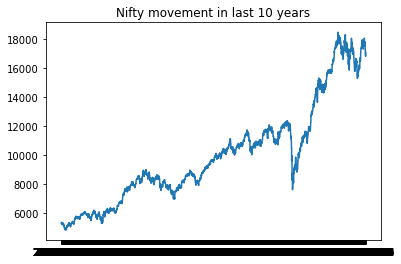

In [45]:
plt.plot(Date,Close)
plt.title("Nifty movement in last 10 years")
plt.show()

Major Observations:
    1. In 10 years term perspective nifty shown upward movement
    2. Indicated in long term market always given positive returns
    3. Need to observe due which variable/factors taken major part in Nifty  spikes and falls